# Into To Data Science
## Group Project
### Group Members
#### Abdul Moeez L1F19BSCS0360
#### Hamza Khurram L1F19BSCS0175
#### Mirza Usama Ali Baig L1F19BSCS507
#### Khawaja Harris L1F19BSCS0229
#### Awais Arshad L1F19BSCS0223

### First We'll Add dependencies

In [1]:
!pip install wordcloud
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)



pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme(style="white")

### Fetching Data 

In [2]:
data = pd.read_csv("titles.csv")

#### Showing Data

In [3]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


### Data Exploration

#### Number of Rows and Columns in Data

In [4]:
data.shape

(5806, 15)

#### Important Features of the Data

In [5]:
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


#### Type of data in the DataFrame

In [6]:
data.info

<bound method DataFrame.info of              id                                title   type  \
0      ts300399  Five Came Back: The Reference Films   SHOW   
1       tm84618                          Taxi Driver  MOVIE   
2      tm127384      Monty Python and the Holy Grail  MOVIE   
3       tm70993                        Life of Brian  MOVIE   
4      tm190788                         The Exorcist  MOVIE   
...         ...                                  ...    ...   
5801  tm1014599                            Fine Wine  MOVIE   
5802  tm1108171                       Edis Starlight  MOVIE   
5803  tm1045018                                Clash  MOVIE   
5804  tm1098060                       Shadow Parties  MOVIE   
5805   ts271048   Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          

## Cleaning the data

Checking the Data for Duplicates

In [7]:
data.duplicated().sum()


0

#### Checking if there are Null values in the data

In [8]:
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

#### Droping the Null value rows from the data

In [9]:
data = data.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
data.isnull().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2141
runtime                    0
genres                     0
production_countries       0
seasons                 3255
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

#### Remaining rows and columns

In [10]:
data.shape

(5041, 15)

## Correlation in the Data and making a Heat Map

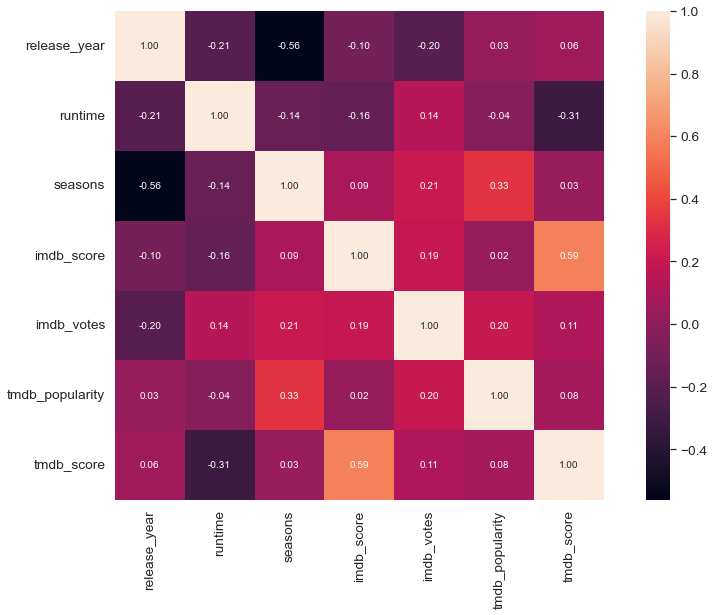

In [11]:
corrmat_shows= data.corr()

sns.set(font_scale=1.25)

f, ax = plt.subplots(figsize=(15,9))

hm_shows= sns.heatmap(corrmat_shows,cbar=True, annot=True, square=True, fmt= ".2f", annot_kws={"size":10,},yticklabels= corrmat_shows.index, xticklabels=corrmat_shows.index)

plt.show()

# Important Questions

## Number of Movies and Shows per Genre

Getting the count of movies and shows in each Genre

In [12]:
data['genres'].value_counts().reset_index().head(10)

,index,genres
0,['comedy'],422
1,['drama'],231
2,['documentation'],229
3,"['comedy', 'drama']",128
4,"['drama', 'romance']",110
5,"['drama', 'comedy']",106
6,['reality'],98
7,"['comedy', 'documentation']",91
8,"['comedy', 'drama', 'romance']",58
9,"['comedy', 'romance']",57


Giving a single genre to each movie and show as some contain multiple and this makes new rows of each movie and show with multiple genres giving single genre in each row

In [13]:
comedy = data[data['genres'].str.contains("'comedy'")]
comedy.loc[:, 'genres'] = 'comedy'

drama = data[data['genres'].str.contains("'drama'")]
drama.loc[:, 'genres'] = 'drama'

doc = data[data['genres'].str.contains("'documentation'")]
doc.loc[:, 'genres'] = 'documentation'

real = data[data['genres'].str.contains('reality')]
real.loc[:, 'genres'] = 'reality'

other = data[~((data["genres"].str.contains("'comedy'")) |\
              (data["genres"].str.contains("'drama'"))|\
              (data["genres"].str.contains("'documentation'"))|\
           (data["genres"].str.contains("'reality'")))]
other.loc[:, 'genres'] = 'other'


gen = pd.concat([comedy, drama, doc, real, other], ignore_index = True)
gen.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
1,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
2,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,comedy,['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
3,tm69778,Lupin the Third: The Castle of Cagliostro,MOVIE,After a successful robbery leaves famed thief ...,1979,PG,100,comedy,['JP'],NaN,tt0079833,7.6,30277.0,14.008,7.5
4,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,R,78,comedy,['US'],NaN,tt0079807,8.1,5141.0,4.681,7.5


## Ploting the Bar Chart

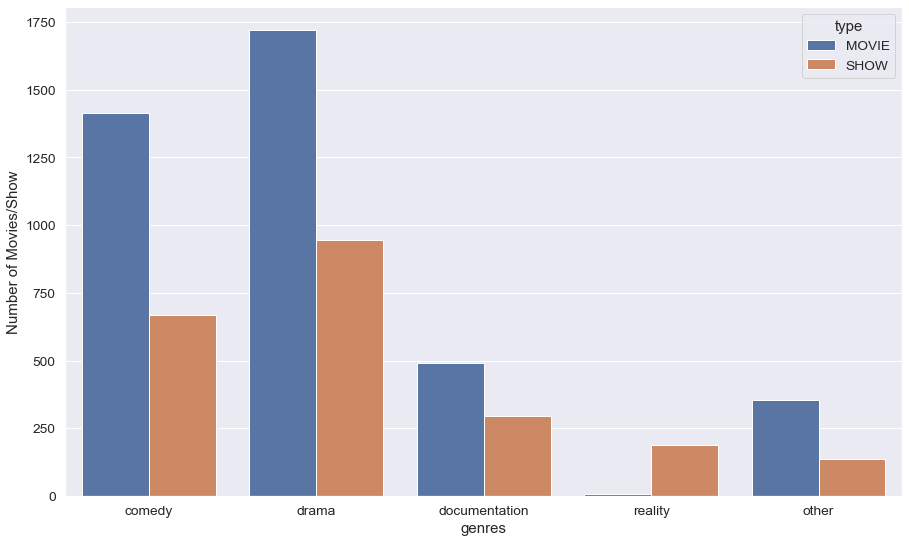

In [14]:
plt.figure(figsize = (15, 9))
p = sns.countplot(x = 'genres', data = gen, hue = 'type')
p.set_ylabel('Number of Movies/Show');

## Movie Productions by Each Country

Getting count of movies produced by different Countries

In [15]:
data['production_countries'].value_counts().reset_index().head(10)

,index,production_countries
0,['US'],1772
1,['IN'],547
2,['JP'],240
3,['GB'],198
4,['KR'],179
5,['ES'],147
6,['FR'],114
7,[],98
8,['CA'],90
9,['MX'],88


### Making different Dataframes for Each Countries

In [16]:
usa = data[data['production_countries'] == "['US']"]
ind = data[data['production_countries'] == "['IN']"]
jpn = data[data['production_countries'] == "['JP']"]
gb = data[data['production_countries'] == "['GB']"]
kor = data[data['production_countries'] == "['KR']"]
es = data[data['production_countries'] == "['ES']"]
fr = data[data['production_countries'] == "['FR']"]
ca = data[data['production_countries'] == "['CA']"]

other =  data[~(data['production_countries'].isin(["['US']","['IN']","['JP']","['GB']","['KR']","['ES']","['FR']","['CA']"]))]
other.loc[:, 'production_countries'] = 'other'

print(data.shape[0] - usa.shape[0] - ind.shape[0] - jpn.shape[0] - gb.shape[0] -\
      kor.shape[0] - es.shape[0] - fr.shape[0] - ca.shape[0] == other.shape[0] )
print(other.shape)

True
(1754, 15)


### Concatinating the different Dataframes

In [17]:
country = pd.concat([usa, ind, jpn, gb, kor, es, fr, ca, other], ignore_index = True)
country.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
2,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
3,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
4,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2


### Plotting the Bar Chart

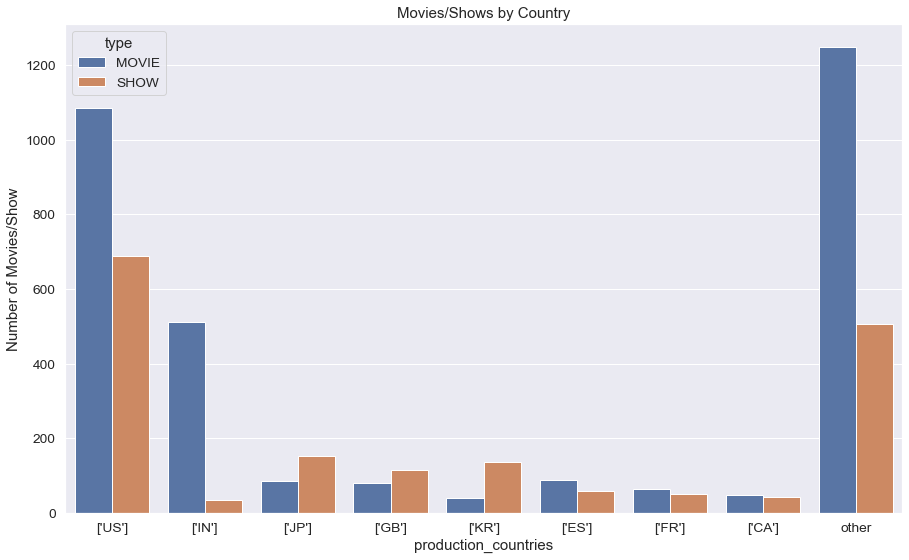

In [18]:
plt.figure(figsize = (15, 9))
sns.countplot('production_countries', data = country, hue = 'type')
plt.ylabel('Number of Movies/Show')
plt.title('Movies/Shows by Country');

## Relation between tmdb score and tmdb popularity of Movies and Shows


In [19]:
show = country[country['type'] == 'SHOW']
show = show.groupby(['production_countries'])['type'].count().reset_index()

movie = country[country['type'] == 'MOVIE']
movie = movie.groupby(['production_countries'])['type'].count().reset_index()

merge = show.merge(movie, on = 'production_countries', how = 'inner', suffixes = ('_s', '_m'))
merge['show_to_movie'] = merge['type_s']/merge['type_m']
merge.sort_values('show_to_movie')

,production_countries,type_s,type_m,show_to_movie
4,['IN'],34,513,0.066277
8,other,506,1248,0.405449
7,['US'],688,1084,0.634686
1,['ES'],59,88,0.670455
2,['FR'],50,64,0.781250
0,['CA'],42,48,0.875000
3,['GB'],116,82,1.414634
5,['JP'],153,87,1.758621
6,['KR'],138,41,3.365854


### Plotting the Scatter Plot

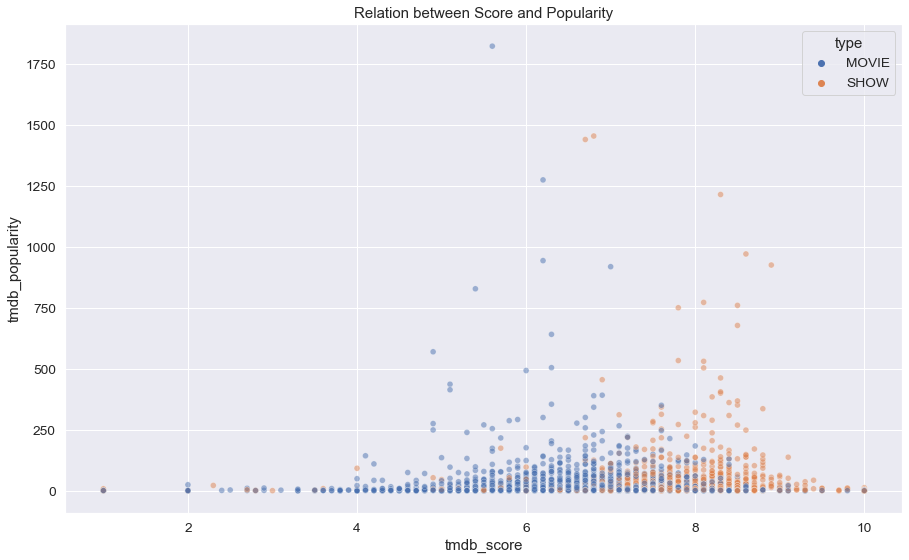

In [20]:
plt.figure(figsize = (15, 9))
sns.scatterplot('tmdb_score', 'tmdb_popularity' , data = country, hue = 'type', alpha = 0.5)
plt.title('Relation between Score and Popularity');

## Most used Words in Titles and Descriptions

In [21]:
description = (data.description)
title = data.title
stopwords = set(STOPWORDS)
wd_description = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(map(str,description)))
wd_title = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(map(str,title)))

### Making the Image

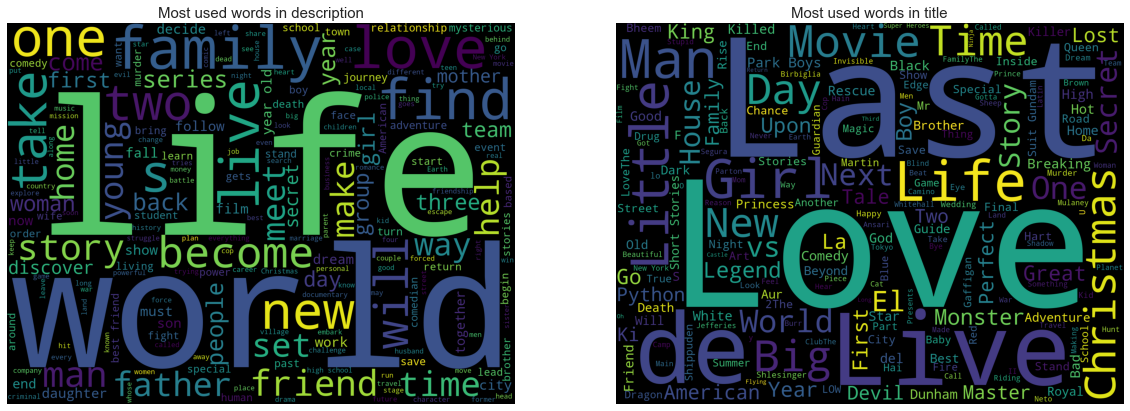

In [22]:
plt.figure(figsize = (20, 20))

plt.subplot(1,2,1)
plt.imshow(wd_description)
plt.title('Most used words in description', size = 15)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wd_title)
plt.title('Most used words in title', size = 15)
plt.axis('off');

## Number of Movies and Shows per Age Cerification

In [23]:
age = data[['type','age_certification']]
age.shape

(5041, 2)

### Plotting the Bar Chart

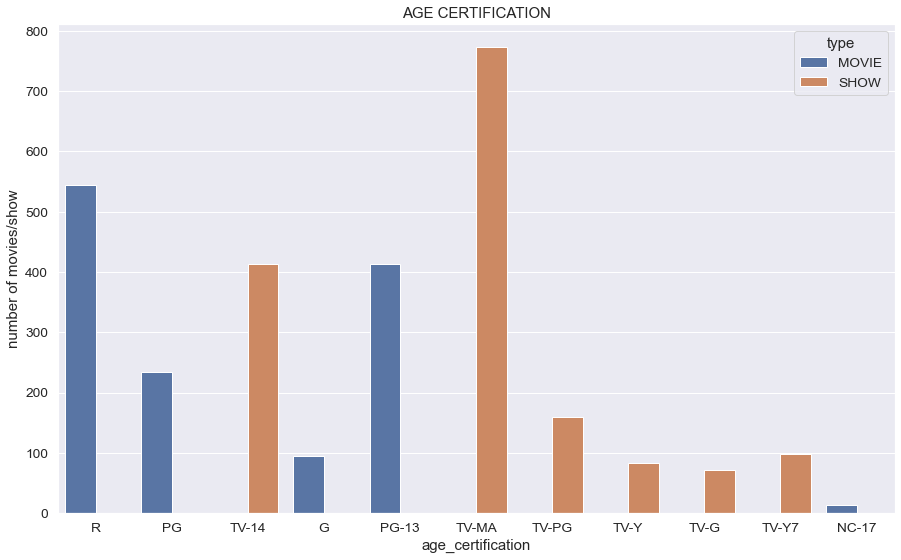

In [24]:
plt.figure(figsize = (15,9))
sns.countplot('age_certification', data = age, hue = 'type')
plt.title('AGE CERTIFICATION')
plt.ylabel('number of movies/show');

## Movies And Shows Released over the Years

In [25]:
release = data[['type','release_year']] 
release = release.rename(columns={"release_year": "Release Year"}) 
con = release.groupby(['Release Year','type']).size().reset_index(name='Total Content')
con 

,Release Year,type,Total Content
0,1953,MOVIE,1
1,1954,MOVIE,2
2,1956,MOVIE,1
3,1958,MOVIE,1
4,1959,MOVIE,1
...,...,...,...
100,2020,SHOW,241
101,2021,MOVIE,381
102,2021,SHOW,262
103,2022,MOVIE,85


### Plotting the Line Plot

Text(0.5, 1.0, 'Movies Per Year')

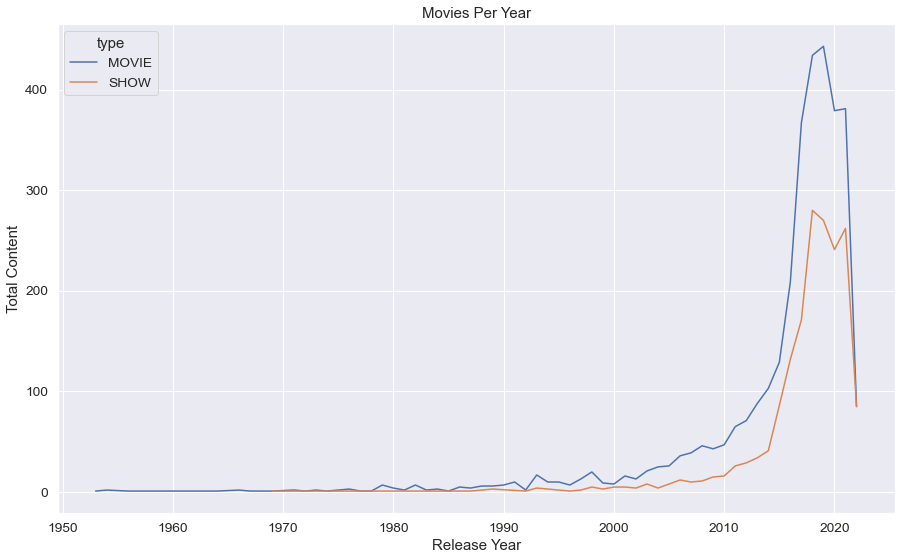

In [26]:
plt.figure(figsize = (15,9))
sns.lineplot(data = con, x = con['Release Year'], y = con['Total Content'], hue = con['type'])
plt.title('Movies Per Year')

## Score of Movies and Shows over the Years and Their Prediction

Made a get Decade Function to divide data into decades using map

In [27]:

def get_decade(val):
  return int(str(val)[0:-1] + "0")


de = data
de['decade'] = de['release_year'].map(get_decade)
de['decade'].value_counts()


2010    3041
2020    1433
2000     355
1990     126
1980      48
1970      21
1960      11
1950       6
Name: decade, dtype: int64

### Plotting the Linear Regression Plot

[Text(0.5, 0, 'Decade'),
 Text(0, 0.5, 'Score (IMDB)'),
 Text(0.5, 1.0, 'Decade vs Score (IMDB)')]

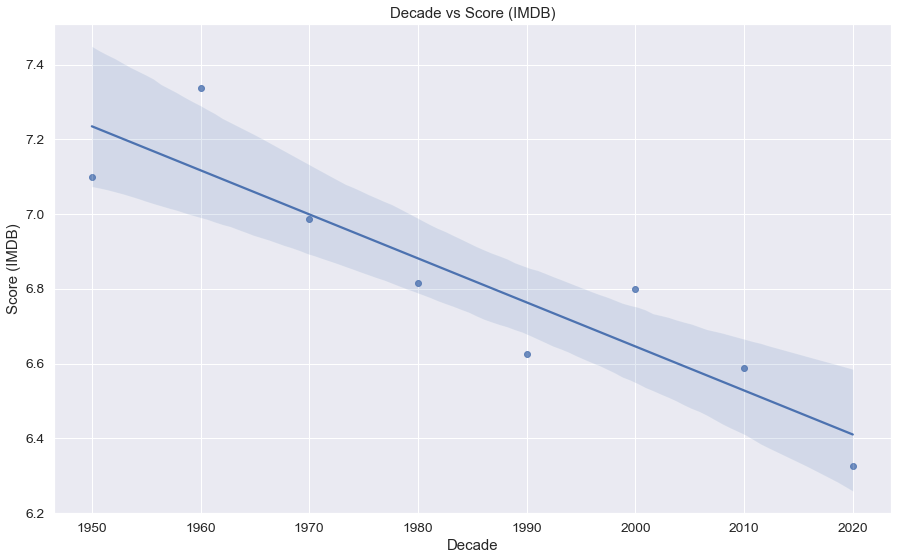

In [28]:
decades = de.groupby('decade').aggregate({"imdb_score": "mean", "tmdb_score": "mean"})
plt.figure(figsize = (15,9))
sns.regplot(x=decades.index, y=decades['imdb_score']).set(xlabel='Decade', ylabel='Score (IMDB)', title='Decade vs Score (IMDB)')

In [29]:
regressor = LinearRegression()
regressor.fit(decades.index.astype("int64").values.reshape(-1,1),decades['imdb_score'])
r2_score = regressor.score(decades.index.astype("int64").values.reshape(-1,1),decades['imdb_score'])
print("The accuracy is : ",end="")
print(r2_score*100,'%')

The accuracy is : 82.46620777836218 %
